# Example 6.2 Numerical ODE solvers

## State-space model

The state-space formulation of the a system is:

$$
\mathbf{\dot{x}}(t) = \mathbf{A}\mathbf{x}(t) + \mathbf{B}\mathbf{f}(t)
$$

where

- $ \mathbf{x}(t) $ is the state vector, representing the system's state variables (displacements and velocities) at a given time.
- $ \mathbf{A} $ is the state matrix, which defines how the state evolves over time without time without force.
- $ \mathbf{B} $ is the input force matrix, which defines how external force affect the system's state.

We will investigate how this equation can be solved numerically.

## Ordinary differential equations (ODEs)

An **ordinary differential equation** (ODE) describes how a variable changes with respect to a single independent variable (time $t$). We consider ODEs on the form:
  $$
  \dot{x}(t) = g(t,x)
  $$  

where $ g(t,x)$ is a user-defined function that describes the dynamics.

- **Scalar ODE example**:
  $$
  \dot{x}(t) =-\lambda x(t), \quad x(0) = x_0
  $$  
  where $x(t)$ is a scalar function of time. Here, $g(t,x)=-\lambda x(t)$.

- **Vector ODE example** (state-space form):  
  $$
  \dot{\mathbf{x}}(t) = \mathbf{A}\mathbf{x}(t) + \mathbf{B}\mathbf{f}(t), \quad \mathbf{x}(0) = \mathbf{x}_0
  $$  
  where $\mathbf{x}(t)$ is a vector function of time. Here, $g(t,\mathbf{x}(t))=\mathbf{A}\mathbf{x}(t) + \mathbf{B}\mathbf{f}(t)$.

---

## Feeding into numerical solvers

In Python, we typically use [`scipy.integrate.solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) to solve ODEs. To use it, we must define:

1. **The right-hand side function**  
   A function `g(t, x)` that evaluates $\dot{\mathbf{x}}(t)$ given the current state `x` and time `t`. It can also incorporate a force `f`.

2. **Time span**  
   The interval of integration, e.g. `t_span = (0, 10)`.

3. **Initial conditions**  
   The starting value of the state, e.g. `x0 = [1, 0]`.

4. **Optional forcing**  
   If there is a time-dependent force $f(t)$, we include it in the right-hand side.  

---

## Example: Mass-spring-damper system

We consider a **single degree-of-freedom** mass-spring-damper system:

$$
m\ddot{u}(t) + c\dot{u}(t) + k u(t) = f(t)
$$

We convert it to state-space form with  

$$
\mathbf{x}(t) = \begin{bmatrix} u(t) \\ \dot{u}(t) \end{bmatrix}, \quad
\mathbf{A} = \begin{bmatrix} 0 & 1 \\ -k/m & -c/m \end{bmatrix}, \quad
\mathbf{B} = \begin{bmatrix} 0 \\ 1/m \end{bmatrix}.
$$

Note: even though we only have one DOF, the state-space model is on vector form (number of states=2).



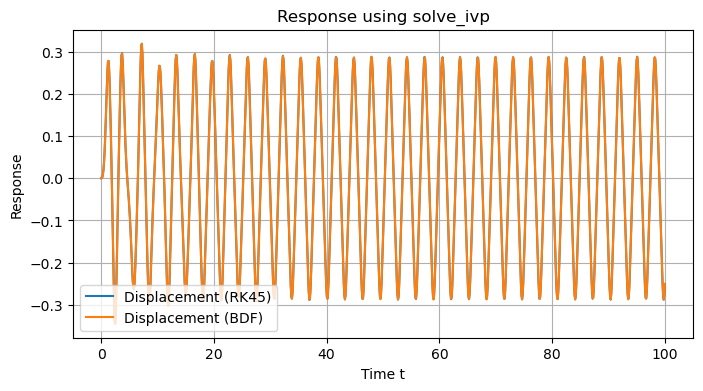

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
m, c, k = 1.0, 0.2, 2.0

# State space matrices
A = np.array([[0, 1],
              [-k/m, -c/m]])
B = np.array([[0],
              [1/m]])

# Forcing function
def f(t):
    return np.array([np.sin(2*t)]) # Returns f at a single time instant t
    
# Right-hand side of the ODE
def function_g(t, x):
    return A @ x + B @ f(t)

# Initial condition and time span
x0 = [0.0, 0.0]       # Initial displacement and velocity
t_span = (0, 100)     # Start and end time
t_eval = np.linspace(t_span[0], t_span[1], 1000) # Time axis for our solution

# Solve ODE
sol = solve_ivp(function_g, t_span, x0, t_eval=t_eval,method='RK45') # Use solver Explicit Runge-Kutta method of order 5(4)
sol2 = solve_ivp(function_g, t_span, x0, t_eval=t_eval,method='BDF') # Use solver Backward Differentiation Formula

# Plot results
plt.figure(figsize=(8,4))
plt.plot(sol.t, sol.y[0], label='Displacement (RK45)')
plt.plot(sol.t, sol2.y[0], label='Displacement (BDF)')
plt.xlabel('Time t')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.title('Response using solve_ivp')
plt.show()